In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def display_img(img):
    fig=plt.figure(figsize=(12,8))
    ax=fig.add_subplot(111)
    ax.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()
    plt.close()

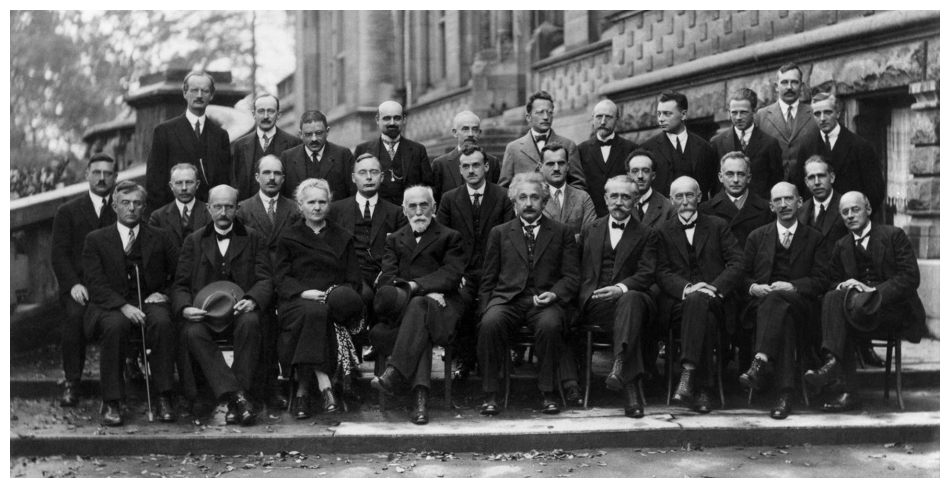

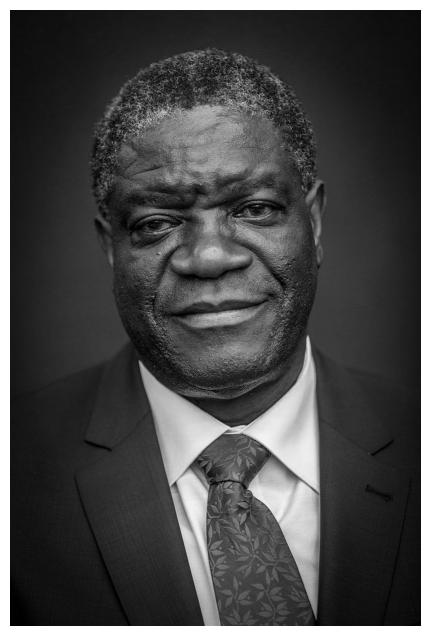

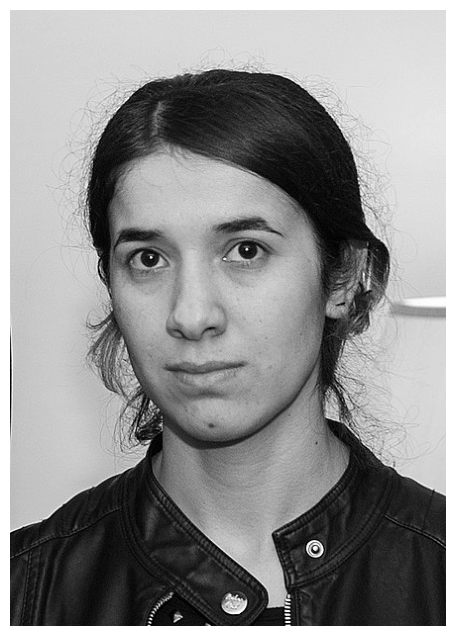

In [3]:
solvayconf_img = cv2.imread('Data/solvay_conference.jpg', 0)

denis_img = cv2.imread('Data/Denis_Mukwege.jpg', 0)

murad_img = cv2.imread('Data/Nadia_Murad.jpg', 0)


display_img(solvayconf_img)
display_img(denis_img)
display_img(murad_img)

In [4]:
solvayconf_img.shape

(806, 1600)

In [5]:
denis_img.shape

(1200, 800)

In [6]:
murad_img.shape

(623, 440)

In [7]:
#pretrained cascade files from opencv - to create classifier

face_cascades = cv2.CascadeClassifier('Data/haarcascades/haarcascade_frontalface_default.xml')


In [8]:
face_cascades

< cv2.CascadeClassifier 0x11671ba30>

In [9]:
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascades.detectMultiScale(face_img)
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (255, 255, 255), 10)
    return face_img

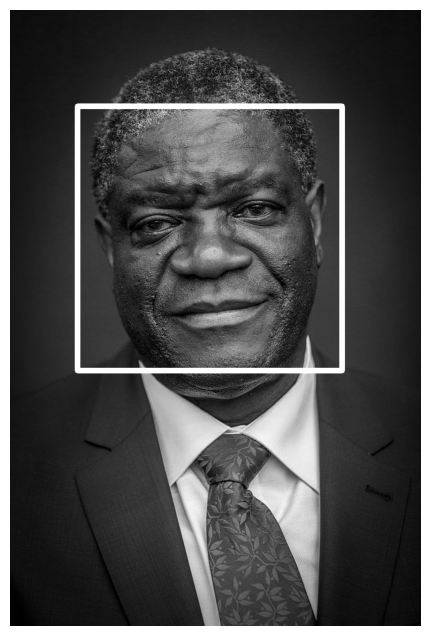

In [10]:
result_img1 = detect_face(denis_img)

display_img(result_img1)

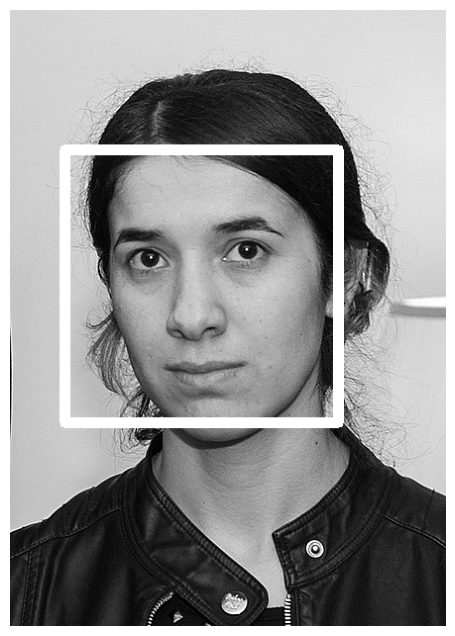

In [11]:
result_img2 = detect_face(murad_img)

display_img(result_img2)

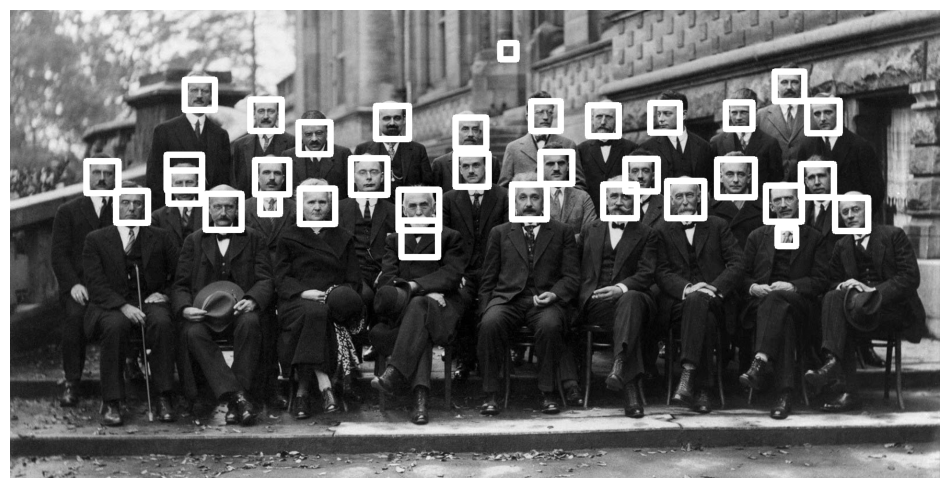

In [12]:
result_img3 = detect_face(solvayconf_img)

display_img(result_img3)

In [13]:
eye_cascades = cv2.CascadeClassifier('Data/haarcascades/haarcascade_eye.xml')

In [14]:
#wrong prediction - so adding parameters - scale factor(scale or size of image), minimum neighbors(no. of neighbors to retain)

def adj_detect_face(img):
    face_img = img.copy()
    face_rects = face_cascades.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)
    
    eye_rects = eye_cascades.detectMultiScale(face_img, scaleFactor=1.1, minNeighbors=7)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (255, 255, 255), 10)
        
    for (xe,ye,we,he) in eye_rects:
        cv2.rectangle(face_img, (xe,ye), (xe+we, ye+he), (0, 100, 100), 4)
    
    return face_img


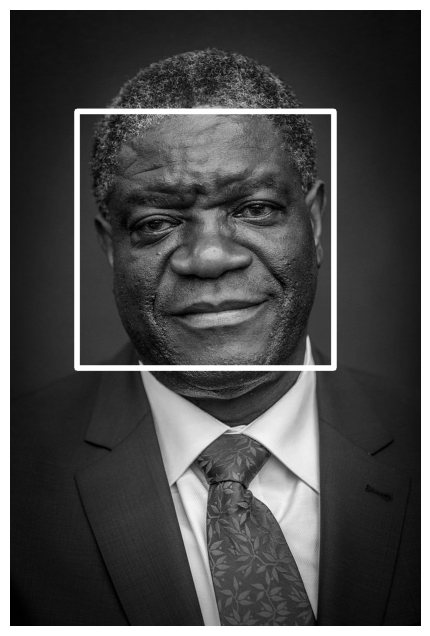

In [15]:
result_img1 = adj_detect_face(denis_img)

display_img(result_img1)

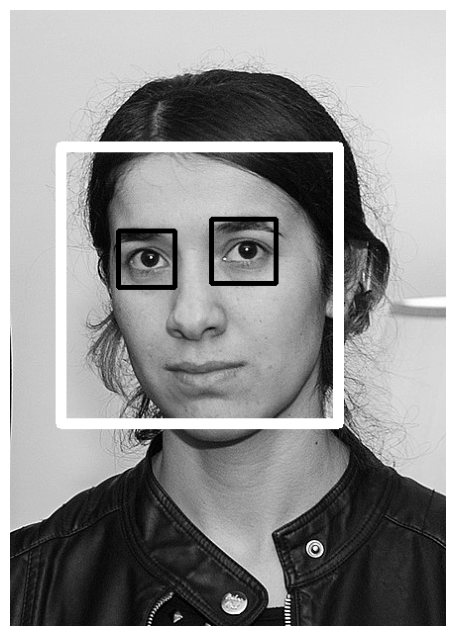

In [16]:
result_img2 = adj_detect_face(murad_img)

display_img(result_img2)

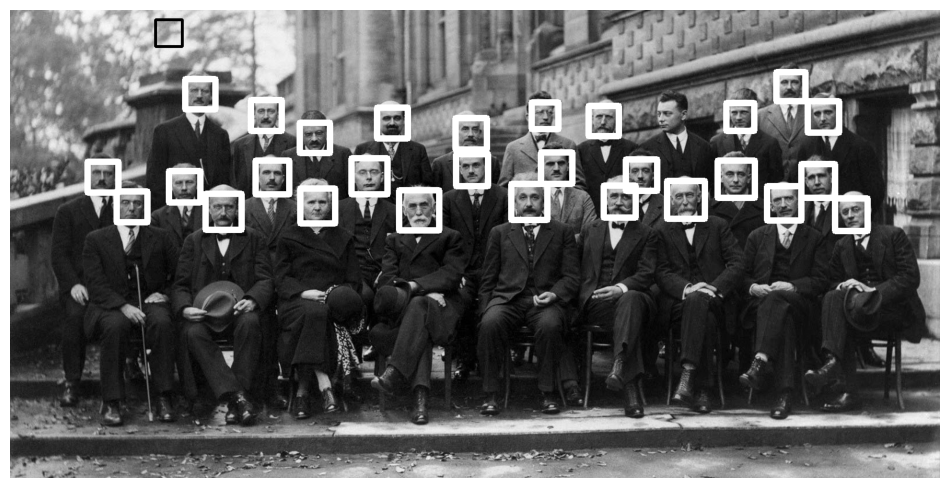

In [17]:
result_img3 = adj_detect_face(solvayconf_img)

display_img(result_img3)